In [30]:
from google.colab import drive
drive.mount('/content/drive')
# string=/content/drive/MyDrive/csv_files/historical_data.csv

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading bitcoin market sentiment data

In [32]:

df = pd.read_csv('/content/drive/MyDrive/csv_files/fear_greed_index.csv') #loading the bitcoin market sentiment dataset
df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [33]:
df.info() #there are no null values in these

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [34]:
#converting dtype of date from object to datetime
df['date'] = pd.to_datetime(df['date'])

In [35]:
duplicates=df.duplicated().sum()
duplicates #there are no duplicates in the dataset

np.int64(0)

In [36]:
df = df.sort_values('date').drop_duplicates(subset=['date']) #sorting values based on date and dropping duplicates of column date

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB


In [38]:
df.describe() # summary statistics of the dataset

,timestamp,value,date
count,2.644000e+03,2644.000000,2644
mean,1.631899e+09,46.981089,2021-09-17 11:44:45.022692864
min,1.517463e+09,5.000000,2018-02-01 00:00:00
25%,1.574811e+09,28.000000,2019-11-26 18:00:00
50%,1.631900e+09,46.000000,2021-09-17 12:00:00
75%,1.688989e+09,66.000000,2023-07-10 06:00:00
max,1.746164e+09,95.000000,2025-05-02 00:00:00
std,6.597967e+07,21.827680,NaN


# Reading historical trader data

In [39]:
df_2=pd.read_csv("/content/drive/MyDrive/csv_files/historical_data.csv") #Loading the historical trader data

In [40]:
df_2.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [41]:
df_2.info() #in this dataeset too there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [57]:
df_2.describe()

,Execution Price,Size Tokens,Size USD,Timestamp IST,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,79225,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,2025-05-01 09:10:16.361502208,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
min,0.000005,8.740000e-07,0.000000e+00,2023-01-05 01:06:00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,2025-02-02 13:02:00,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,2025-06-02 19:46:00,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,2025-10-01 03:49:00,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,2025-12-04 23:55:00,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12
std,29447.654868,1.042729e+05,3.657514e+04,NaN,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09


In [42]:
df_2['Timestamp IST'] = pd.to_datetime(df_2['Timestamp IST'], errors='coerce') #converting dtype of timestamp from object to time

# EDA on Sentiment Data alone

In [43]:
#Mapping sentiment categories to numeric values
df['sentiment_num'] = df['classification'].map({
    'Fear': 0,
    'Extreme Fear': 0.1,
    'Neutral': 0.5,
    'Greed': 1,
    'Extreme Greed': 1.1
})

/tmp/ipython-input-1113061981.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='classification', order=df['classification'].value_counts().index,palette='viridis')


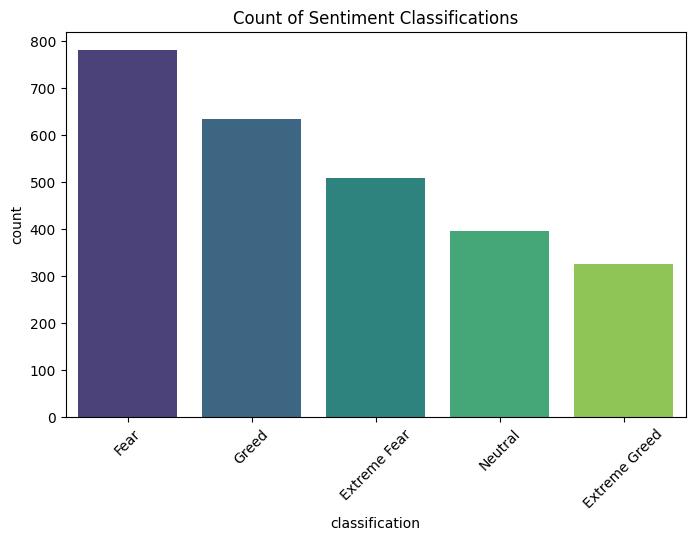

In [44]:
# Distribution of classification
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='classification', order=df['classification'].value_counts().index,palette='viridis')
plt.xticks(rotation=45)
plt.title("Count of Sentiment Classifications")
plt.show()

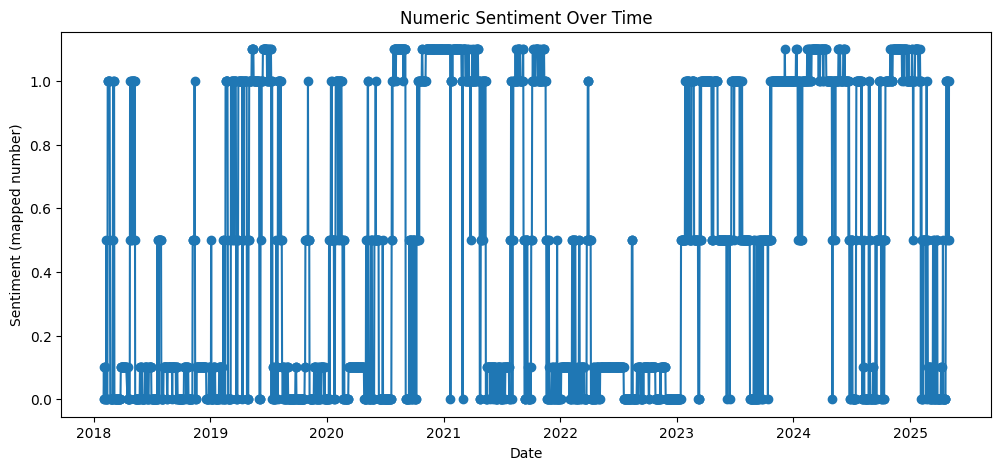

In [49]:
# Time series of numeric sentiment
plt.figure(figsize=(12,5))
plt.plot(df['date'], df['sentiment_num'], marker='o', linestyle='-')
plt.title("Numeric Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Sentiment (mapped number)")
plt.show()

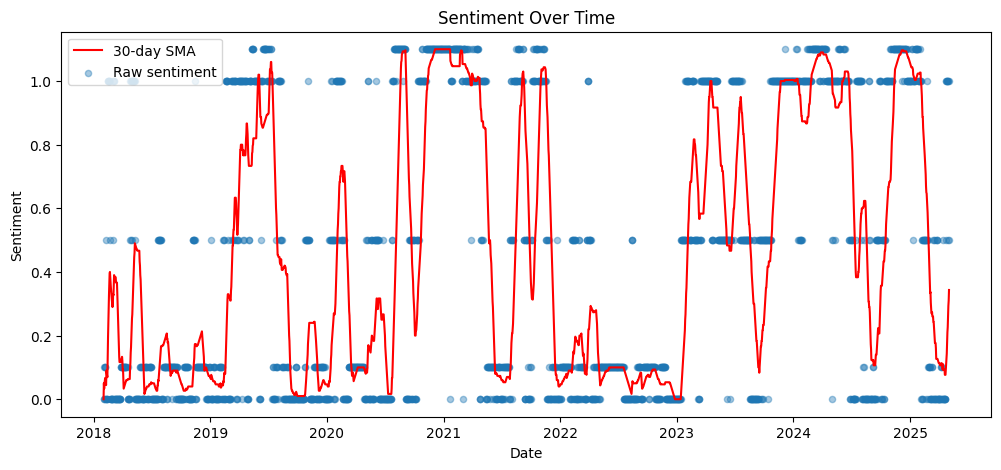

In [50]:
# As there is  lot of noise in above grapph we'll plot a rolling avg. graph to show the trend more clearly
df = df.sort_values('date')
df['sma_30'] = df['sentiment_num'].rolling(window=30, min_periods=1).mean() #simple moving average of 30 days

plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['sma_30'], label='30-day SMA', color='red')
plt.scatter(df['date'], df['sentiment_num'], s=20, alpha=0.4, label='Raw sentiment')
plt.title("Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Sentiment")
plt.legend()
plt.show()


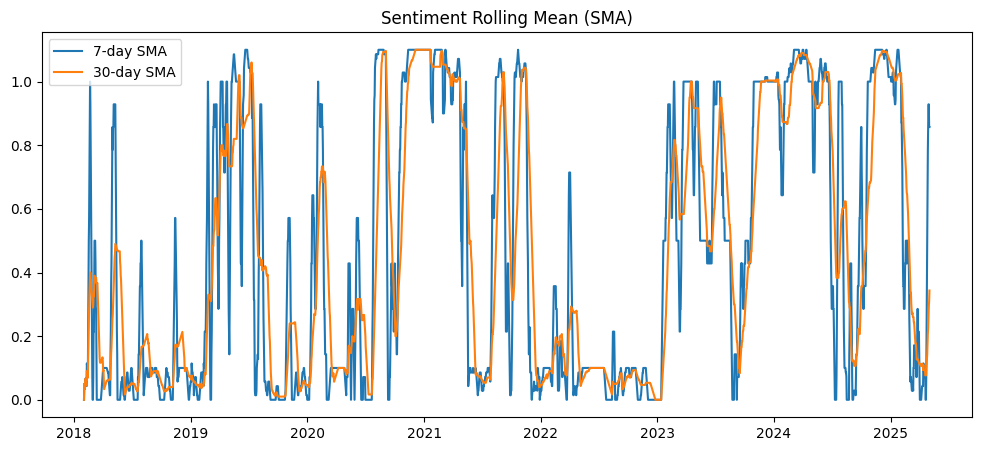

In [52]:
df['sma_7'] = df['sentiment_num'].rolling(window=7, min_periods=1).mean()
df['sma_30'] = df['sentiment_num'].rolling(window=30, min_periods=1).mean()

plt.figure(figsize=(12,5))
plt.plot(df['date'], df['sma_7'], label='7-day SMA')
plt.plot(df['date'], df['sma_30'], label='30-day SMA')
plt.legend()
plt.title("Sentiment Rolling Mean (SMA)")
plt.show()

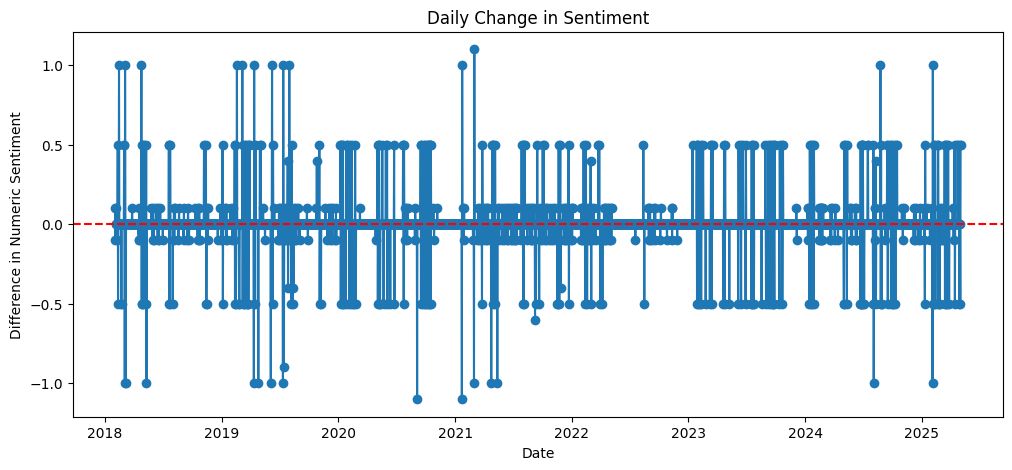

In [55]:
df['sent_diff'] = df['sentiment_num'].diff() #creating a new column is
plt.figure(figsize=(12,5))
plt.plot(df['date'], df['sent_diff'], marker='o', linestyle='-')
plt.axhline(0, color='red', linestyle='--')
plt.title("Daily Change in Sentiment")
plt.xlabel("Date")
plt.ylabel("Difference in Numeric Sentiment")
plt.show()


# EDA on Trades Alone

In [61]:
# seeing unique values in key categorical columns
print("Unique sides :", df_2['Side'].unique())
print("Unique coins:", df_2['Coin'].nunique(), df_2['Coin'].unique()[:10])

Unique sides : ['BUY' 'SELL']
Unique coins: 246 ['@107' 'AAVE' 'DYDX' 'AIXBT' 'GMX' 'EIGEN' 'HYPE' 'SOL' 'SUI' 'DOGE']


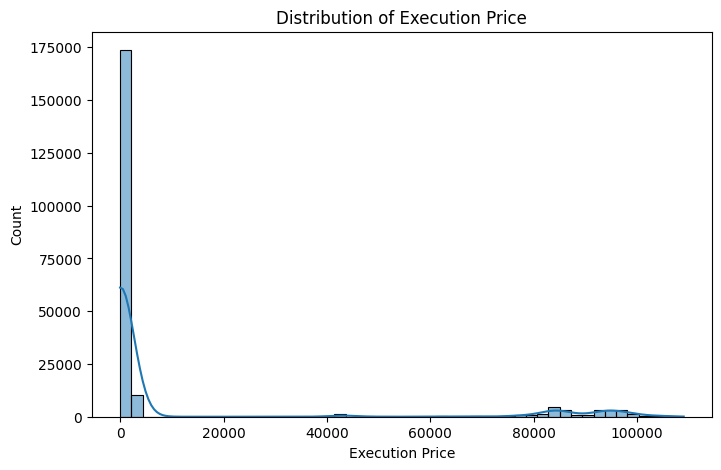

In [63]:
#Execution Price distribution
plt.figure(figsize=(8,5))
sns.histplot(df_2['Execution Price'], bins=50, kde=True)
plt.title("Distribution of Execution Price")
plt.xlabel("Execution Price")
plt.show()

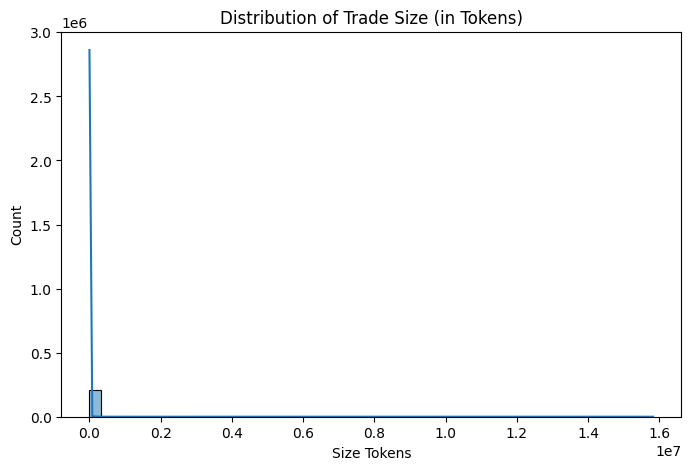

In [67]:
#  Trade Size (Tokens) distribution
plt.figure(figsize=(8,5))
sns.histplot(df_2['Size Tokens'], bins=50, kde=True)
plt.title("Distribution of Trade Size (in Tokens)")
plt.show()

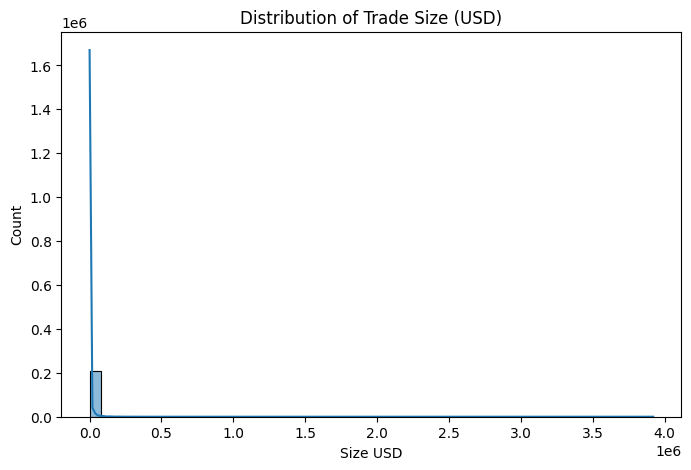

In [68]:
plt.figure(figsize=(8,5))
sns.histplot(df_2['Size USD'], bins=50, kde=True)
plt.title("Distribution of Trade Size (USD)")
plt.show()


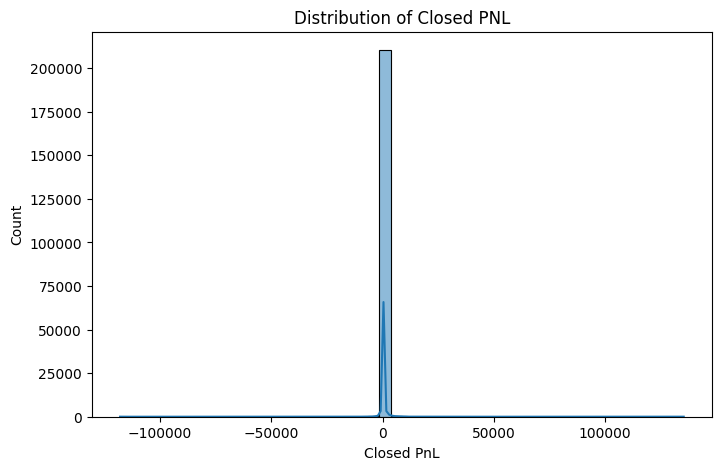

In [72]:
# Closed PNL (profit or loss) distribution
plt.figure(figsize=(8,5))
sns.histplot(df_2['Closed PnL'], bins=50, kde=True)
plt.title("Distribution of Closed PNL")
plt.show()

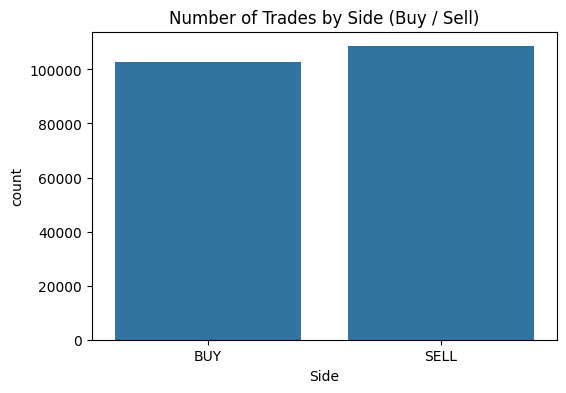

In [74]:
# buy vs sell counts
plt.figure(figsize=(6,4))
sns.countplot(data=df_2, x='Side')
plt.title("Number of Trades by Side (Buy / Sell)")
plt.show()

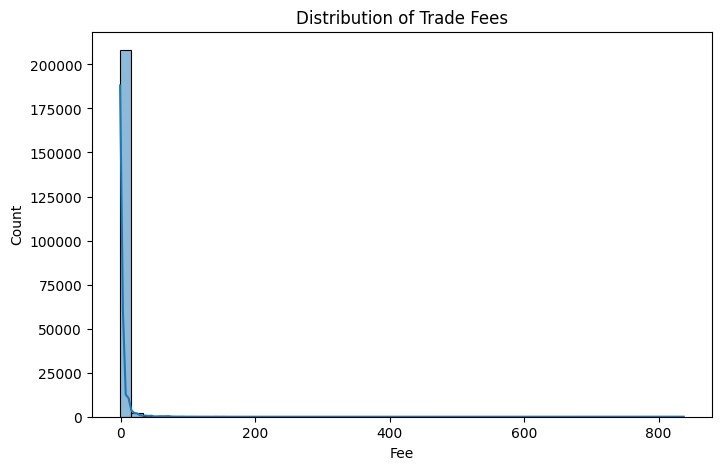

In [76]:
#  Fee distribution
plt.figure(figsize=(8,5))
sns.histplot(df_2['Fee'], bins=50, kde=True)
plt.title("Distribution of Trade Fees")
plt.show()

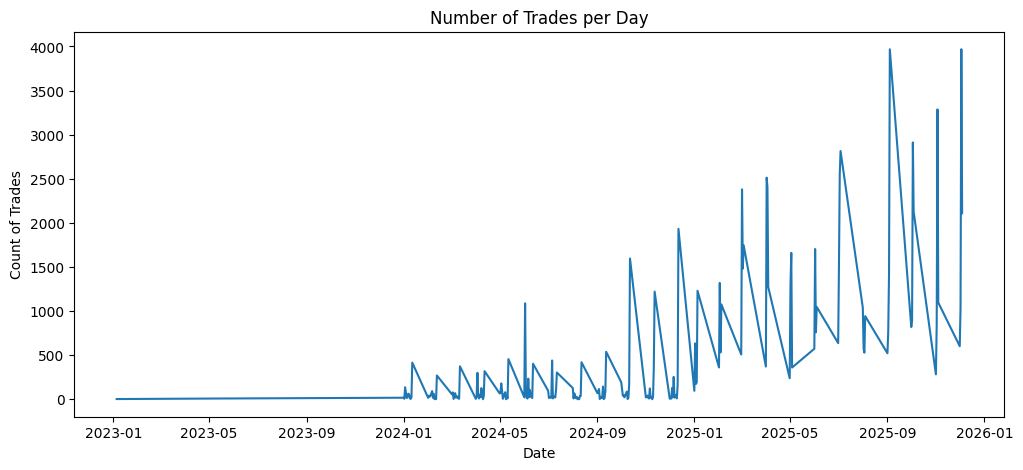

In [78]:
df_2['date_only'] = df_2['Timestamp IST'].dt.date
daily_counts = df_2.groupby('date_only').size().reset_index(name='num_trades')

plt.figure(figsize=(12, 5))
plt.plot(pd.to_datetime(daily_counts['date_only']), daily_counts['num_trades'])
plt.title("Number of Trades per Day")
plt.xlabel("Date")
plt.ylabel("Count of Trades")
plt.show()

Outliers in Closed PnL: 48941 rows


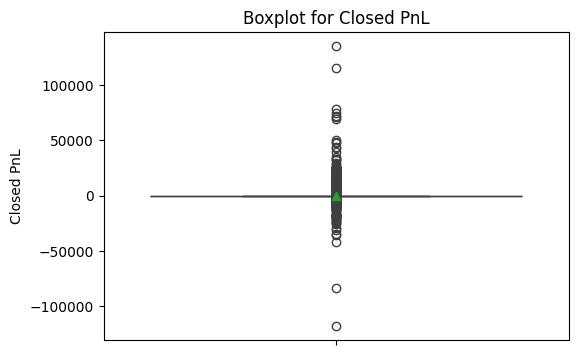

Outliers in Size Tokens: 34744 rows


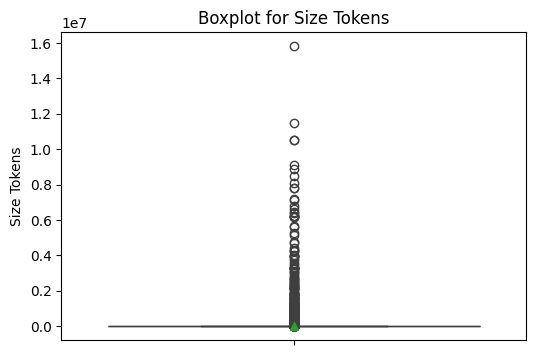

Outliers in Size USD: 32661 rows


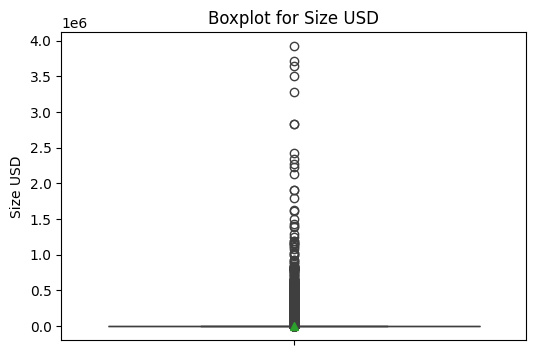

Outliers in Fee: 30278 rows


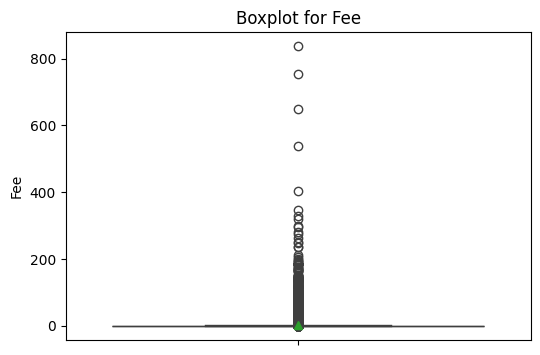

In [88]:

#finding outiers in the numerical data
for col in ['Closed PnL', 'Size Tokens', 'Size USD', 'Fee']:
    # Calculate IQR
    Q1 = df_2[col].quantile(0.25)
    Q3 = df_2[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_2[(df_2[col] < (Q1 - 1.5 * IQR)) | (df_2[col] > (Q3 + 1.5 * IQR))]
    print(f"Outliers in {col}: {len(outliers)} rows")

    # Plot boxplot correctly using Seaborn
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_2, y=col, showmeans=True)  # showmeans optional but helpful :contentReference[oaicite:3]{index=3}
    plt.title(f"Boxplot for {col}")
    plt.show()


        Coin           sum        mean  count
4       @107  2.783913e+06   92.821850  29992
137     HYPE  1.948485e+06   28.652079  68005
205      SOL  1.639556e+06  153.358519  10691
120      ETH  1.319979e+06  118.298874  11158
105      BTC  8.680447e+05   33.304356  26064
161  MELANIA  3.903511e+05   88.155165   4428
117      ENA  2.173295e+05  219.524751    990
210      SUI  1.992688e+05  100.691680   1979
240      ZRO  1.837778e+05  148.327509   1239
112     DOGE  1.475432e+05  178.623676    826


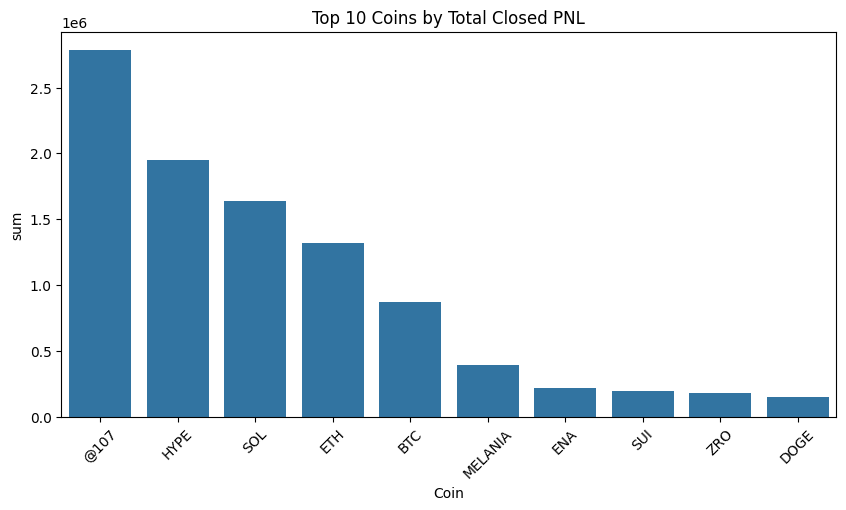

In [91]:
pnl_by_coin = df_2.groupby('Coin')['Closed PnL'].agg(['sum', 'mean', 'count']).reset_index()
print(pnl_by_coin.sort_values('sum', ascending=False).head(10))

# Visualize top 10 coins by total PNL
top = pnl_by_coin.sort_values('sum', ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(data=top, x='Coin', y='sum')
plt.xticks(rotation=45)
plt.title("Top 10 Coins by Total Closed PNL")
plt.show()

# Merged Analysis

In [95]:

df_2['date_only'] = df_2['Timestamp IST'].dt.date
df['date_only'] = df['date'].dt.date

In [96]:
merged = pd.merge(
    df_2,
    df[['date_only', 'sentiment_num']],
    left_on='date_only',
    right_on='date_only',
    how='inner'
)#merging both the datasets

In [97]:
merged

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date_only,sentiment_num
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.8700,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,1.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.0000,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,1.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.0900,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,1.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.9800,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,1.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.7300,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35859,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,ETH,3627.0000,0.1387,503.06,SELL,2025-04-01 21:53:00,-443.143300,Open Short,0.0,0xeacbc003b3919c468166041aa5e84d01b6006967bcae...,60647462186,False,0.050306,4.190000e+14,1.740000e+12,2025-04-01,0.0
35860,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,ETH,3627.0000,2.9050,10536.43,SELL,2025-04-01 21:53:00,-443.282000,Open Short,0.0,0xe47714c2d752e1a171bf041aa5e84f01ef008aff277a...,60647462186,False,1.053643,6.720000e+14,1.740000e+12,2025-04-01,0.0
35861,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,ETH,3627.0000,0.8280,3003.16,SELL,2025-04-01 21:53:00,-446.187000,Open Short,0.0,0x9dad279d5f05919e1b60041aa5e84f01f4002a2dd2c2...,60647462186,False,0.300315,4.530000e+14,1.740000e+12,2025-04-01,0.0
35862,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,ETH,3627.0000,0.7642,2771.75,SELL,2025-04-01 21:53:00,-447.015000,Open Short,0.0,0xc363e90dbf42a7250427041aa5e84f01f6006e68416d...,60647462186,False,0.277175,3.550000e+14,1.740000e+12,2025-04-01,0.0


In [102]:
#  Daily aggregated metrics
daily = merged.groupby('date_only').agg({
    'Closed PnL': 'sum',
    'Size USD': 'sum',
    'Trade ID': 'count',   # number of trades
    'sentiment_num': 'mean'
}).reset_index().rename(columns={'Trade ID': 'num_trades'})

In [103]:
daily['date_only'] = pd.to_datetime(daily['date_only'])

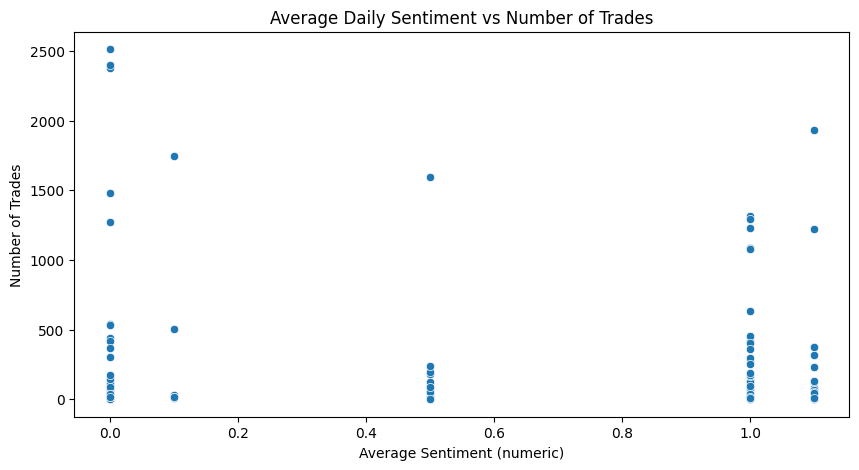

In [101]:
# Scatter plot sentiment vs number of trades
plt.figure(figsize=(10,5))
sns.scatterplot(data=daily, x='sentiment_num', y='num_trades')
plt.title("Average Daily Sentiment vs Number of Trades")
plt.xlabel("Average Sentiment (numeric)")
plt.ylabel("Number of Trades")
plt.show()




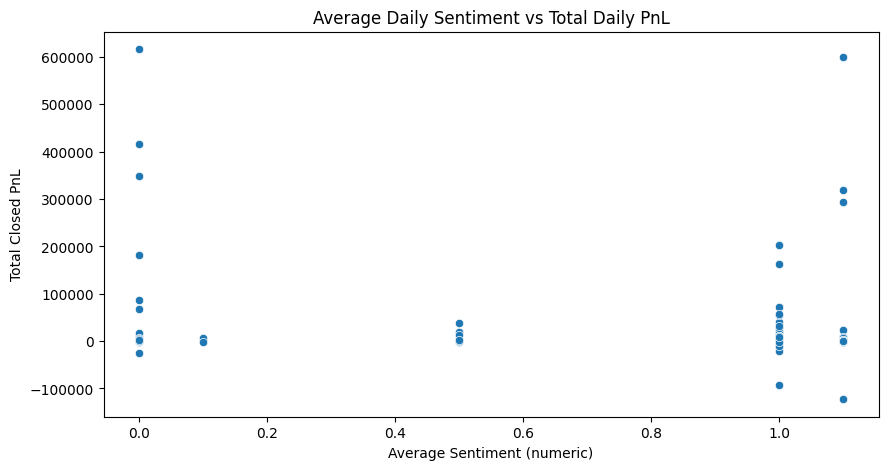

In [105]:
#  ScatterPlot for sentiment vs daily PnL
plt.figure(figsize=(10,5))
sns.scatterplot(data=daily, x='sentiment_num', y='Closed PnL')
plt.title("Average Daily Sentiment vs Total Daily PnL")
plt.xlabel("Average Sentiment (numeric)")
plt.ylabel("Total Closed PnL")
plt.show()

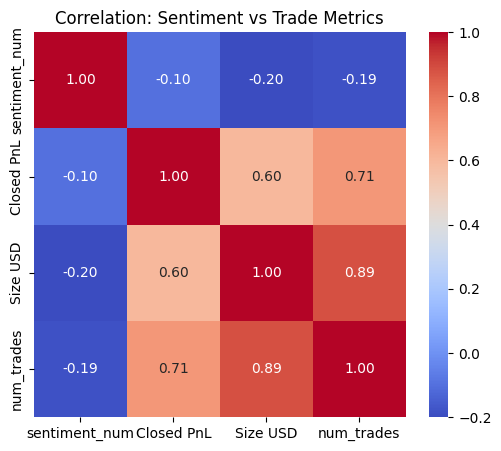

In [107]:
#  Correlation heatmap
corr = daily[['sentiment_num', 'Closed PnL', 'Size USD', 'num_trades']].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation: Sentiment vs Trade Metrics")
plt.show()

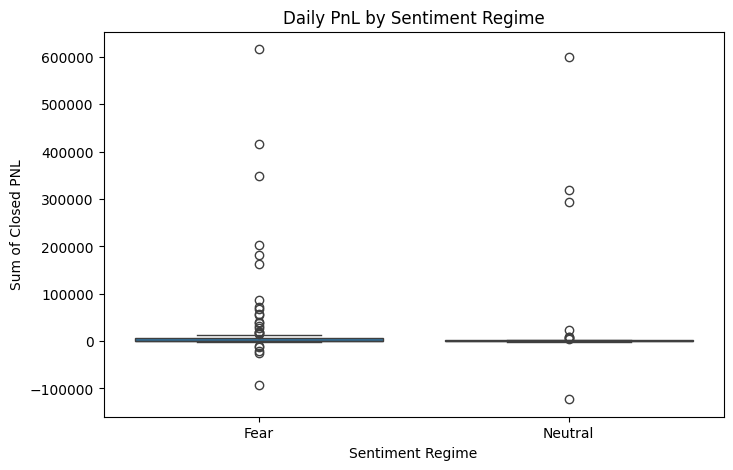

In [109]:

# Regime-based analysis
def regime(x):
    if x <= 1:
        return 'Fear'
    elif x >= 3:
        return 'Greed'
    else:
        return 'Neutral'

daily['sentiment_regime'] = daily['sentiment_num'].apply(regime)

plt.figure(figsize=(8,5))
sns.boxplot(data=daily, x='sentiment_regime', y='Closed PnL')
plt.title("Daily PnL by Sentiment Regime")
plt.xlabel("Sentiment Regime")
plt.ylabel("Sum of Closed PNL")
plt.show()